In [1]:
import tensorflow as tf

C:\Users\Rohit\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets("/tmp/data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
sample=mnist.train.images[4].reshape(28,28)

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

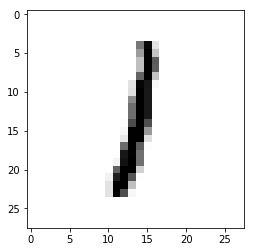

In [9]:
plt.imshow(sample,cmap='Greys')

In [10]:
learning_rate = 0.001
training_epochs = 15

In [11]:
batch_size = 100
n_classes = 10
n_samples = mnist.train.num_examples
n_input = 10

In [12]:
n_inputs=784

In [13]:
n_hidden_1 = 256
n_hidden_2 = 256

In [14]:
def multilayer_perceptron(x,weights,bias):
    #layer1
    layer_1 = tf.add(tf.matmul(x,weights['h1']),bias['b1'])
    layer_1 = tf.nn.relu(layer_1)
    #layer2
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),bias['b2'])
    layer_2 = tf.nn.relu(layer_2)
    #outputlayr
    out_layer = tf.matmul(layer_2,weights['out']) + bias['out']
    
    return out_layer

In [15]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_inputs,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [16]:
bias = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [17]:
x=tf.placeholder('float',[None,n_inputs])
y=tf.placeholder('float',[None,n_classes])


In [18]:
pred=multilayer_perceptron(x,weights,bias)

In [19]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [25]:
t = mnist.train.next_batch(1)

In [30]:
#running the model

In [32]:
sess = tf.InteractiveSession()

In [33]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [34]:
sess.run(init)

In [37]:
for epoch in range(training_epochs):
    avg_cost = 0.0
    total_batch=int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost +=c/(total_batch)
    print("epoch : {} cost: {:4f}".format(epoch+1,avg_cost))
print("model has completed {} epochs of training".format(training_epochs))

epoch : 1 cost: 0.639450
epoch : 2 cost: 0.634632
epoch : 3 cost: 0.467431
epoch : 4 cost: 0.474971
epoch : 5 cost: 0.445264
epoch : 6 cost: 0.408102
epoch : 7 cost: 0.388721
epoch : 8 cost: 0.295784
epoch : 9 cost: 0.407443
epoch : 10 cost: 0.311979
epoch : 11 cost: 0.361870
epoch : 12 cost: 0.274833
epoch : 13 cost: 0.225429
epoch : 14 cost: 0.252973
epoch : 15 cost: 0.355910
model has completed 15 epochs of training


In [38]:
##model evaluation

In [39]:
correct_pred = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [43]:
correct_pred = tf.cast(correct_pred,float)

In [44]:
correct_pred

<tf.Tensor 'Cast:0' shape=(?,) dtype=float32>

In [45]:
accuracy = tf.reduce_mean(correct_pred)

In [47]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9538